In [1]:
import numpy as np
import tensorflow as tf
import seaborn as sns
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
tf.__version__

'2.9.1'

In [36]:
# Python 3.10.1

# Step-1: Load Keras Dataset

In [2]:
tf.config.experimental.list_physical_devices() # Return a list of physical devices visible to the host runtime.

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [38]:
tf.test.is_built_with_cuda() # Returns whether TensorFlow was built with CUDA (GPU) support.

True

In [39]:
(xtrain,ytrain), (xtest,ytest) =tf.keras.datasets.cifar10.load_data()

In [40]:
xtrain.shape # 3 refers RGB

(50000, 32, 32, 3)

In [41]:
xtest.shape

(10000, 32, 32, 3)

In [42]:
ytrain.shape

(50000, 1)

In [43]:
ytest.shape

(10000, 1)

In [44]:
xtrain[0]
xtrain[0].ndim

3

In [45]:
ytrain[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

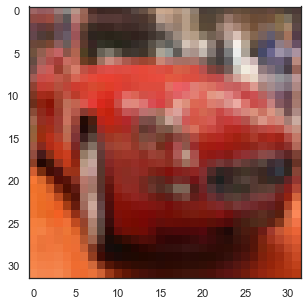

In [46]:
plt.figure(figsize=(5,5))
sns.set(style='white')
plt.imshow(xtrain[5])

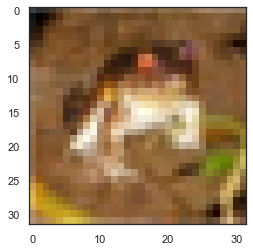

In [47]:
def image(x):
    plt.imshow(xtrain[x])

image(0) 

In [48]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']# creating an array using image name

In [49]:
ytrain[0]

array([6], dtype=uint8)

In [50]:
ytrain[2][0]

9

In [51]:
classes[9]

'truck'

In [52]:
classes[ytrain[1][0]]

'truck'

# Step-2: Scaling

In [53]:
xtrain_scaled=xtrain/255
xtest_scaled=xtest/255

In [54]:
xtrain_scaled.shape # 

(50000, 32, 32, 3)

In [55]:
xtest.shape

(10000, 32, 32, 3)

In [56]:
ytrain_categorical=keras.utils.to_categorical(ytrain, num_classes=10, dtype='float32') # Converts a class vector (integers) to binary class matrix.
ytrain_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [57]:
ytest_categorical=keras.utils.to_categorical(ytest, num_classes=10, dtype='float32') # Converts a class vector (integers) to binary class matrix.
ytest_categorical[:5]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

    Note: 
This function returns a matrix of binary values (either ‘1’ or ‘0’). It has number of rows equal to the length of the input vector and number of columns equal to the number of classes.

In [58]:
32*32*3

3072

# Step-3: Building keras model 

In [59]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)), # flatten images from 3D to 1D
    keras.layers.Dense(3000,activation='relu'),  # hidden layer
    keras.layers.Dense(1000,activation='relu'),  # hidden layer
    keras.layers.Dense(10,activation='sigmoid') # output layer
])

In [60]:
# Compiling model
model.compile(
    optimizer='SGD',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(xtrain_scaled,ytrain_categorical,epochs=1)

1563/1563 [==============================] - 184s 117ms/step - loss: 1.8092 - accuracy: 0.3573


    | Note: 
When running this, by default it is using GPU

After completing epochs the model is trained 

# Step-4: prediction

In [61]:
model.predict(xtest_scaled) # show all prediction values

313/313 [==============================] - 11s 30ms/step


array([[0.3813467 , 0.4451869 , 0.78571194, ..., 0.1181746 , 0.551819  ,
        0.19050701],
       [0.6286324 , 0.8664057 , 0.4769775 , ..., 0.19054289, 0.91811687,
        0.9807755 ],
       [0.77397865, 0.7371397 , 0.5166375 , ..., 0.2671742 , 0.9435817 ,
        0.9351879 ],
       ...,
       [0.22466235, 0.16594915, 0.6133213 , ..., 0.5824134 , 0.2788418 ,
        0.2458566 ],
       [0.27153763, 0.30320457, 0.7891609 , ..., 0.40426108, 0.22734766,
        0.4011646 ],
       [0.46402094, 0.16352588, 0.785697  , ..., 0.7754185 , 0.26689735,
        0.37429467]], dtype=float32)

In [62]:
model.evaluate(xtest_scaled,ytest_categorical)

313/313 [==============================] - 10s 31ms/step - loss: 1.7449 - accuracy: 0.3606


[1.744940996170044, 0.36059999465942383]

In [63]:
model.predict(xtest_scaled)[0] # show all possible prediction values of zero index

313/313 [==============================] - 8s 27ms/step


array([0.3813467 , 0.4451869 , 0.78571194, 0.81417   , 0.45100194,
       0.71233135, 0.5544068 , 0.1181746 , 0.551819  , 0.19050701],
      dtype=float32)

In [64]:
np.argmax(model.predict(xtest_scaled)[0]) # it will give the index number of prediction values  v

313/313 [==============================] - 9s 29ms/step


3

In [65]:
# predicted image
classes[np.argmax(model.predict(xtest_scaled)[0])]  # image of zero index of ytest

313/313 [==============================] - 9s 28ms/step


'cat'

In [66]:
ytest[0]

array([3], dtype=uint8)

In [67]:
# truth image 
classes[ytest[0][0]] # image of zero index of ytest

'cat'

# Step-5: Performance Test

In [68]:
def get_model():
    model=keras.Sequential([
        keras.layers.Flatten(input_shape=(32,32,3)), # flatten images from 3D to 1D
        keras.layers.Dense(3000,activation='relu'),  # hidden layer
        keras.layers.Dense(1000,activation='relu'),  # hidden layer
        keras.layers.Dense(10,activation='sigmoid') # output layer
        ])

    # Compiling model
    model.compile(
        optimizer='SGD',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

In [69]:
# CPU 
%%timeit -n1 -r1 # measure the total execution time
with tf.device('/CPU:0'):
    cpu_model=get_model()
    cpu_model.fit(xtrain_scaled,ytrain_categorical,epochs=1)

1563/1563 [==============================] - 228s 145ms/step - loss: 1.8145 - accuracy: 0.3532
3min 49s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [70]:
# GPU
%%timeit -n1 -r1
with tf.device('/GPU:0'):
    cpu_model=get_model()
    cpu_model.fit(xtrain_scaled,ytrain_categorical,epochs=1)

1563/1563 [==============================] - 155s 98ms/step - loss: 1.8142 - accuracy: 0.3525
2min 38s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
